# Video Games Analysis

In [177]:
import pandas as pd

#movies = pd.read_csv('/Users/chrisraddatz/imdb-videogames.csv') #For mac

movies = pd.read_csv(r'C:\Users\Chris\Downloads\imdb-videogames.csv') #For windows

import warnings
warnings.filterwarnings('ignore')

# Quick overview of dataset and removing some unnecessary columns

In [178]:
movies.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


There's a column that serves as index, we don't need that. Other columns that don't seem very relevant to visualization/analysis are:
- Url
- Plot

In [179]:
movies.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [180]:
drop_cols = ['Unnamed: 0', 'url', 'plot']
movies.drop(columns = drop_cols, inplace = True)

### General Info

In [181]:
print(movies.shape)
print(movies.info())

(20803, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20803 non-null  object 
 1   year         20536 non-null  float64
 2   certificate  7903 non-null   object 
 3   rating       11600 non-null  float64
 4   votes        11600 non-null  object 
 5   Action       20803 non-null  bool   
 6   Adventure    20803 non-null  bool   
 7   Comedy       20803 non-null  bool   
 8   Crime        20803 non-null  bool   
 9   Family       20803 non-null  bool   
 10  Fantasy      20803 non-null  bool   
 11  Mystery      20803 non-null  bool   
 12  Sci-Fi       20803 non-null  bool   
 13  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), object(3)
memory usage: 995.6+ KB
None


In [182]:
movies.head()

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",True,True,False,False,False,False,False,False,False


I think there are some good routes to look for analysis within this dataset. Here are some ideas:
1. Look at the flux of votes or ratings over years
2. Identify which categories are most popular via votes/ratings
3. Identify possible trends between certificates and ratings/votes
4. Segment data for only the most popular games: Ratings above 7.0 and/or by vote and then compare the same things


Let's first get a view at how the data might be entered and see if any null values are present.

### Cleaning

In [183]:
for c in movies.columns:
    counts = movies[c].isnull().value_counts()
    print("The number of null values within this columns is: {}\n".format(counts))

The number of null values within this columns is: False    20803
Name: name, dtype: int64

The number of null values within this columns is: False    20536
True       267
Name: year, dtype: int64

The number of null values within this columns is: True     12900
False     7903
Name: certificate, dtype: int64

The number of null values within this columns is: False    11600
True      9203
Name: rating, dtype: int64

The number of null values within this columns is: False    11600
True      9203
Name: votes, dtype: int64

The number of null values within this columns is: False    20803
Name: Action, dtype: int64

The number of null values within this columns is: False    20803
Name: Adventure, dtype: int64

The number of null values within this columns is: False    20803
Name: Comedy, dtype: int64

The number of null values within this columns is: False    20803
Name: Crime, dtype: int64

The number of null values within this columns is: False    20803
Name: Family, dtype: int64

The numb

So all the binary columns seem to be filled in which is great, for the other columns some of them have over half being null, let's not remove those just yet, as that would take out a large portion of the data. But I'd say we can take out null values in "year" as it's only 267 counts. 

In [184]:
movies = movies[movies.year.isnull() != True]

I also want to change the binary columns to actual binary rather than true and false.

In [185]:
for i in movies.columns[5:]:
    movies[i] = movies[i].astype(int)

Now let's look at segmenting the data and getting some summary statistics in, before we do our visualizations.

### Segmentation and Summary Statistics

In [186]:
pd.set_option("display.max_rows", None) #So we can see all of the values
movies['year'].value_counts()

2019.0    956
2018.0    872
2017.0    863
2016.0    828
2015.0    761
2020.0    721
2021.0    704
2013.0    670
2014.0    662
2012.0    631
2011.0    592
2010.0    548
2009.0    542
2006.0    522
2003.0    507
2002.0    502
1994.0    488
2004.0    486
2005.0    485
2008.0    480
2001.0    480
2007.0    475
2000.0    453
1999.0    448
1995.0    440
1993.0    438
1996.0    436
2022.0    422
1998.0    409
1997.0    383
1992.0    365
1991.0    313
1990.0    282
1989.0    251
1982.0    231
1983.0    225
1987.0    209
1988.0    207
1986.0    194
1984.0    176
1981.0    165
1985.0    153
1980.0    112
1975.0     83
1979.0     82
1978.0     73
2023.0     53
1977.0     53
1976.0     29
1972.0     18
1973.0     15
2024.0     13
1974.0     13
1971.0      5
2025.0      3
1970.0      2
1969.0      2
1962.0      2
1952.0      1
1964.0      1
2027.0      1
Name: year, dtype: int64

In [187]:
movies['year'] = movies['year'].astype(int)#To get rid of the .0 at end of each value

In [188]:
before_70s = movies[movies.year < 1970]
_70s = movies.copy(
)[(movies['year'] >= 1970) & (movies['year'] < 1980)]
_80s = movies.copy(
)[(movies['year'] >= 1980) & (movies['year'] < 1990)]
_90s = movies.copy(
)[(movies['year'] >= 1990) & (movies['year'] < 2000)]
_00s = movies.copy(
)[(movies['year'] >= 2000) & (movies['year'] < 2010)]
_current = movies[movies.year >= 2010]
#bush = all_three.copy(
#)[(all_three['Time'].dt.year >= 2001) & (all_three['Time'].dt.year < 2009)]

In [189]:
movies_70s

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
2536,Space Invaders,1978,K-A,7.6,833,True,False,False,False,False,False,False,True,False
2751,Death Race,1976,NaN,7.0,51,True,False,False,False,False,False,False,True,False
3357,Asteroids,1979,Unrated,7.1,528,True,False,False,False,False,False,False,True,False
3539,Breakout,1976,NaN,7.2,115,True,False,False,False,True,False,False,False,False
4104,Fascination,1974,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False
4191,Computer Space,1971,NaN,6.3,36,True,False,False,False,False,False,False,True,False
4753,Star Cruiser,1977,NaN,5.6,7,True,False,False,False,False,False,False,True,False
5003,Star Trek,1972,NaN,5.4,15,True,False,False,False,False,False,False,True,False
5036,Space Stranger,1979,NaN,NaN,NaN,True,False,False,False,False,False,False,True,False
5078,Laser Clay Shooting System,1973,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False


Just from looking at the 70s movies, it seems that a lot of the data has null values represented. This fills in the question as to why so much of the data had null values: it's outdated.

In [190]:
data_frames = [before_70s, _70s, _80s, _90s, _00s, _current]
years = ["Before 1970s","1970s", "1980s","1990s","2000s","Last Decade"]
for data, year in zip(data_frames, years):
    print("{} Average Rating: {:.2f}\nNumber of Games Represented:{}\n".format(year,data['rating'].mean(), len(data['rating'])))

Before 1970s Average Rating: 6.92
Number of Games Represented:6

1970s Average Rating: 5.15
Number of Games Represented:373

1980s Average Rating: 6.38
Number of Games Represented:1923

1990s Average Rating: 7.05
Number of Games Represented:4002

2000s Average Rating: 7.17
Number of Games Represented:4932

Last Decade Average Rating: 7.13
Number of Games Represented:9300



In [193]:
import numpy as np

#segmented_years['year'] = 1960 if segmented_years['year'] < 1970
segmented_years['year'] = np.where(segmented_years["year"] < 1970, 1960)
segmented_years.loc[(segmented_years["year"] >= 1970) & (segmented_years["year"] < 1980), 'year'] = 1970
segmented_years.loc[(segmented_years["year"] >= 1980) & (segmented_years["year"] < 1990), 'year'] = 1980
segmented_years.loc[(segmented_years["year"] >= 1990) & (segmented_years["year"] < 2000), 'year'] = 1990
segmented_years.loc[(segmented_years["year"] >= 2000) & (segmented_years["year"] < 2010), 'year'] = 2000
segmented_years.loc[segmented_years["year"] >= 2010, 'year'] = 2010

#df.loc[df["gender"] == "male", "gender"] = 1
#df["gender"] = np.where(df["gender"] == "female", 0, 1)

In [194]:
segmented_years['year'].value_counts()

1980    20530
1960        6
Name: year, dtype: int64

In [ ]:
segmented_years.head()

In [ ]:
segmented_years['Comedy'].value_counts()

In [ ]:
sns.boxplot(movies, x = 'year', y='')

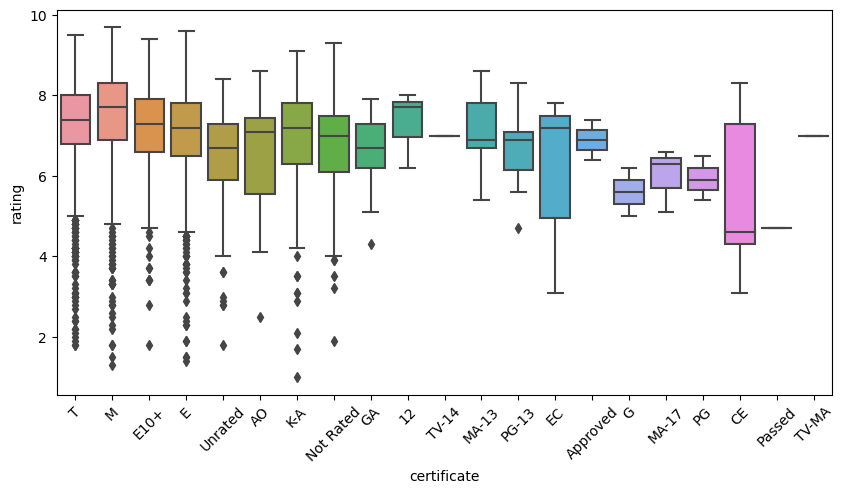

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

sns.boxplot(movies['certificate'], movies['rating'])

plt.xticks(rotation = 45)
plt.show()

# Outline
- First look at data: We've done that
- Second, Identify what is pivotal for data visualization and analysis, possibly machine learning. 
- Third, Find routes of how to clean the data:
    - Removing useless columns or null data

- Fourth, Use seaborn and/or matplotlib to visualize data
- Fifth, Seek out ways to segment the data and visualize further
- Sixth, machine learning